<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Applied_Statistics/Logistic_Regression_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Model Building in Scikit-learn** - *A Pime Indians Case Study*
---

![Pime Indians](https://imgc.artprintimages.com/img/print/pima-indian-with-baskets_u-l-q1ibcl40.jpg?artHeight=550&artPerspective=n&artWidth=550&background=fbfbfb)

**Image taken from**: [ART](https://www.art.com/products/p53776052240-sa-i989351/pima-indian-with-baskets.htm)

##**1. Loading Data**

Let's build a diabetes prediction model using a logistic regressio classifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Biostats_GC/archive (1).zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
path = "/content/diabetes.csv"
diabetes = pd.read_csv(path)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##**2. Selecting features**

Here, we need to divide the given columns into two types of variables, dependent (or target variable) and independent variables (or feature variables).

In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabetes['Outcome'].unique()

array([1, 0])

In [ ]:
#We split the data into response variable (y) and explanatory variables (X).
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes[features]
y = diabetes['Outcome']


A brief description of the data:

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
X.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000


In [ ]:
#Print to take a look of the variables
print(X.head())
print("----------------")
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
----------------
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


###**2.1 A Graphical Representation Example**




In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

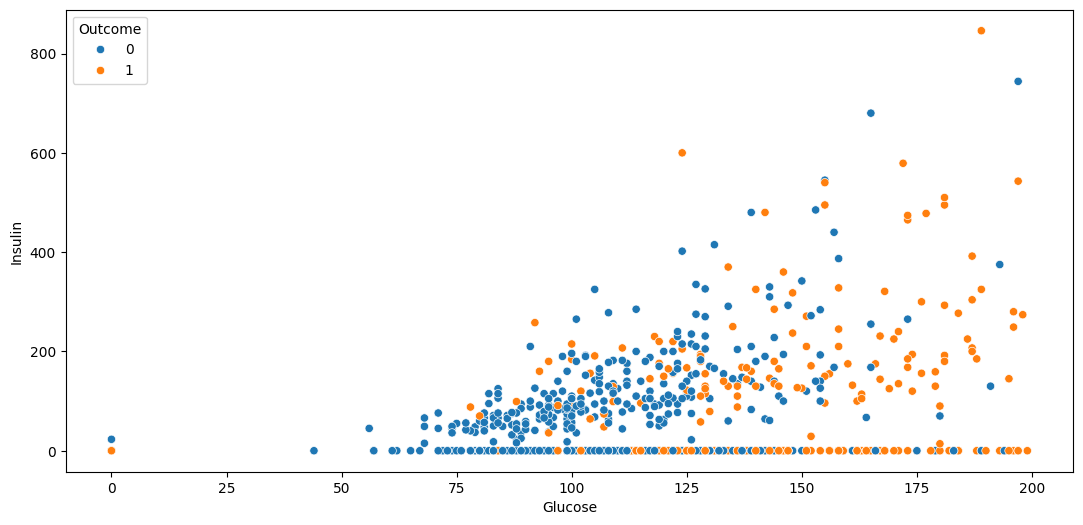

In [ ]:
# We generate a plot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize = (13, 6))
g = sns.scatterplot(diabetes, x = "Glucose", y = "Insulin", ax= ax,
                    hue = "Outcome")
#fig.suptitle('Average Temperature Vs Total CO2 emissions per year')
#ax.set_xlabel('Total annual emissions of CO2 in millions of tons')
plt.plot();
#plt.savefig("Global_Average_Temperature_Vs_Tital_Annual_Emissions_per_year.png");


##**3. Splitting data**

To understand model performance, dividing the dataset into a trining set and a test set is a good strategy (Model training). ---> **Machine Learning**

Let's split the dataset by using the function `train_test_split()`. You need to pass 3 parameters: `features`, `target`, and `test_set size`. Additionally, you can use `random_state` to select records randomly.


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state=16)
print("Train Data:")
print(X_train[:5])
print(y_train[:5])
print("-------------------------------")
print("Test Data:")
print(X_test[:5])
print(y_test[:5])

Train Data:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
171            6      134             70             23      130  35.4   
222            7      119              0              0        0  25.2   
565            2       95             54             14       88  26.1   
576            6      108             44             20      130  24.0   
152            9      156             86             28      155  34.3   

     DiabetesPedigreeFunction  Age  
171                     0.542   29  
222                     0.209   37  
565                     0.748   22  
576                     0.813   35  
152                     1.189   42  
171    1
222    0
565    0
576    0
152    1
Name: Outcome, dtype: int64
-------------------------------
Test Data:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
515            3      163             70             18      105  31.6   
462            8       74             70             40  

Here, the dataset is split into two parts in a ratio of 80:20. It means 80% data will be used for model trianing and 20% for model testing.

##**4. Model development and prediction**

*i)* First, import the `LogisticRegression` omdule and create a logistic regression classifier onject using the `LogisticRegression()` function with `random_state` for reproductibility.

*ii)* Then, fit your model on the train set employing `fit()` and perform prediction on the test set using `predict()`.




###**4.1 Model Training**



In [ ]:
# Import the class
from sklearn.linear_model import LogisticRegression

# Instantiate the model (using `max_iter` set to 500 to promote
# model's convergence)
model = LogisticRegression(random_state=123, max_iter=500)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500, random_state=123)

In [ ]:
# Predictions
import numpy as np
user = int(input("How many predictions do you want to compare?: "))
y_pred = model.predict(X_test)
print(f'First {user} predictions by the model: {y_pred[:user]}')
print("----------")
print(f'First {user} observations: {np.array(y_test)[:user]}')

How many predictions do you want to compare?: 20
First 20 predictions by the model: [1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0]
----------
First 20 observations: [1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0]


##**5. Model Evaluation employing Confusion Matrix**

A confusion matrix is a table that is used to evaluate the performance of a classification model. *The fundamental part of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.*

![Confusion Matrix](https://glassboxmedicine.com/wp-content/uploads/2019/02/confusion-matrix.png?w=431&h=243)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix_1= metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_1

array([[95,  7],
       [21, 31]])

###**5.1 Confusion matrix evaluation metrics**

Now, let's evaluate the model using `classification_report` for accuracy, precision, and recall.


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Without diabetes', 'With diabetes']
print(classification_report(y_test, y_pred, target_names = target_names))

                  precision    recall  f1-score   support

Without diabetes       0.82      0.93      0.87       102
   With diabetes       0.82      0.60      0.69        52

        accuracy                           0.82       154
       macro avg       0.82      0.76      0.78       154
    weighted avg       0.82      0.82      0.81       154



Based on this report, we got a classification rate of **82%**, considered as *good* accuracy.

**Definitions**:

**Precision**: Precision is about being precise, i.e., how accurate the model is. When the model makes a prediction how often it is correct.

**Recall**: If there are patients who have diabetes in the test set and your logistic regression model can identify it **60%** of the time.

##**6. ROC Curve**

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. *It illustrates the tradeoff between sensitivity and specificity*.


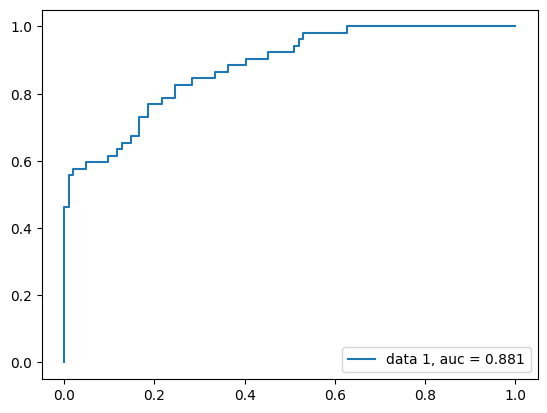

In [ ]:
y_pred_prob = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label = f"data 1, auc = {auc:.3f}" )
plt.legend(loc = 4)
plt.show()

##**7. Coefficients**

Th folowing code enables us to compute the logistic regresion coefficients:

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# Instance to print the model's coefficients.
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
print('The Model Coefficientes are: ')
for i in range(8):
  print(f'Beta_{i + 1} ({features[i]}): {model.coef_[0][i]:.4f}')
  i += 1
print("----------------")
print(f'The model intercept is equal to: {model.intercept_[0]:.4f}')


The Model Coefficientes are: 
Beta_1 (Pregnancies): 0.0882
Beta_2 (Glucose): 0.0334
Beta_3 (BloodPressure): -0.0139
Beta_4 (SkinThickness): 0.0008
Beta_5 (Insulin): -0.0013
Beta_6 (BMI): 0.0901
Beta_7 (DiabetesPedigreeFunction): 0.6753
Beta_8 (Age): 0.0147
----------------
The model intercept is equal to: -7.8654


##**8. Visualization**


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

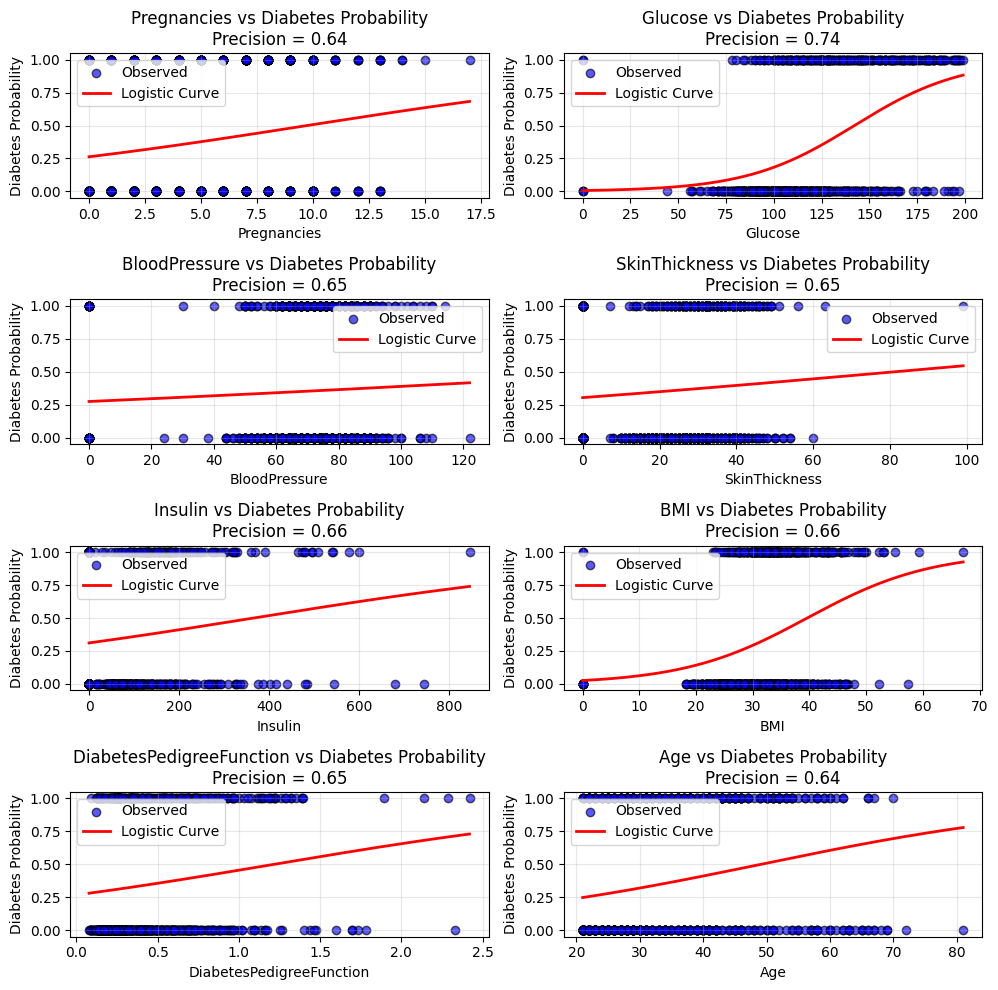

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score

# Variables for plotting
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
y = diabetes['Outcome']

# Create scatter plots with logistic regression fitted curves
plt.figure(figsize=(10, 10))

for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)

    X = diabetes[[feature]]  # Selecting a single column as a DataFrame
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                        random_state=16)

    # Fit Logistic Regression model
    log_model = LogisticRegression(random_state=123, max_iter=500)
    log_model.fit(X_train, y_train)

    # Generate predicted probabilities for a smooth logistic curve
    X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # Fine grid of X values
    y_prob = log_model.predict_proba(X_range)[:, 1]  # Get probability of class 1

    # Scatter plot of original data
    plt.scatter(X, y, alpha=0.65, color='blue', edgecolor='k', label='Observed')

    # Plot logistic regression S-curve
    plt.plot(X_range, y_prob, color='red', linewidth=2, label='Logistic Curve')

    # Compute and display precision score
    y_train_pred = log_model.predict(X_train)
    prec_score = precision_score(y_train, y_train_pred, average='micro')

    plt.title(f'{feature} vs Diabetes Probability\nPrecision = {prec_score:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Diabetes Probability')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout();
plt.show();


**Conclusion**:

*Advantages*:

Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

*Disadvantages*:

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.


###**Discussion Questions**

**1. Understanding the Logistic Function**

- What is the purpose of the sigmoid (logistic) function in logistic regression?
- Why does logistic regression model probabilities instead of direct numerical outcomes?
- How does the sigmoid function ensure that the predicted values remain between 0 and 1?

**2. Coefficients and Interpretation**

- In a logistic regression model, how do we interpret the coefficients (β)?
- If a coefficient is positive, what does that indicate about the relationship between the predictor and the target variable?
- How do we interpret the odds ratio associated with each predictor variable?

**3. Decision Boundaries and Classification**

- How does logistic regression define a decision boundary for classification?
- What happens if we change the classification threshold from 0.5 to 0.3 or 0.7?
- In what situations might we adjust the threshold for better classification performance?

**4. Model Performance and Evaluation**

- Why is accuracy not always the best metric for evaluating logistic regression?
- What are precision, recall, and F1-score, and why are they important in classification problems?
- How does the ROC curve help evaluate model performance? What does the AUC score represent?

**5. Logistic Regression vs. Other Classification Models**

- How does logistic regression compare to decision trees or support vector machines in terms of interpretability?
- In what situations would you not use logistic regression for classification?
- What are the main assumptions of logistic regression, and when might they be violated?

